# Building a Half Adder Circuit 

## Adding 1+1 using quantum circuits

We will first make our own half adder using Qiskit. This includes encoding the input, processing using quantum gates and extracting the result.

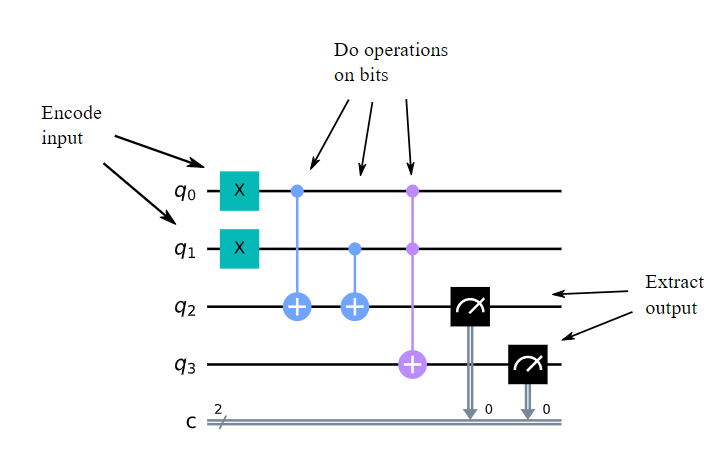

This is what our end circuit should look like. First, we will import the required libraries from Qiskit

In [1]:
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

Let us encode the input and build the circuit for adding 1+1 on a four qubit system.

We want our adder to perform its operation as follows

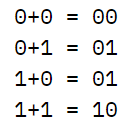

**Observations**-The rightmost bit in all four cases is completely determined by whether the two bits we are adding are the same or different. So for 0+0 and 1+1, where the two bits are equal, the rightmost bit of the answer comes out 0. For 0+1 and 1+0, where we are adding different bit values, the rightmost bit is 1.

So in order to get a correct answer, we need to apply a quantum gate such that its output is dependent on whether the input bits are different or same. In classical computation, we would use an XOR gate to perform this task.

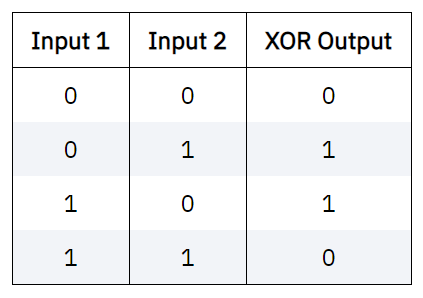

In quantum computing, the CNOT gate(or controlled-NOT gate) acts in a similar way to the XOR gate. In qiskit the gate is represented by qx.

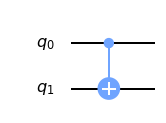

In [2]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')

This CNOT is a binary gate or applied to two qubits. One acts as the control qubit(q0) The other acts as the target qubit(q1). The CNOT looks at two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes 0 if they are the same, and 1 if they are different.

Let us start making our circuit!

### Step 1: Encode the input 

In [3]:
qc = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc.x(0) #flips 1st qubit to 1
qc.x(1) #flips 2nd qubit to 1 since we want to perform the addition 1+1


### Step 2:  Use a CNOT to write the XOR of inputs on qubit 2

In [4]:
# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)

### Step 3: Extract outputs 

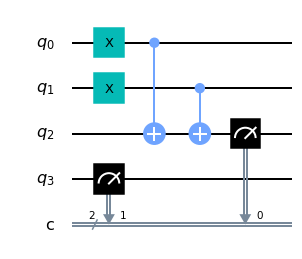

In [5]:
# extract outputs
qc.measure(2,0) # extract XOR value
qc.measure(3,1)

qc.draw(output='mpl')

**Explanation of circuit**

1.To add 1+1, we first apply a 𝑋 gate to q0 and q1 as these are the qubits we want to add.

1. Let q2 be the target qubit(represented by big circle with a plus sign). Now, if q0 is the control qubit, and if q0 is 1(which in our case it is since we applied the 𝑋 gate, and q2 is 0. Now these are different, so the value of 1 is stored in the target qubit. Next, q2 becomes 1 and q1 is also 1. Since these are the same, a value of 0 is assigned to q2. Now the measurement of this bit is taken and stored in a classical bit. This is the second bit whose value gets stored as 0.

What about the first bit? If you look at the four possible sums, there is only one case for which the first bit is 1 instead of 0: 1+1=10. It happens only when both the bits we are adding are 1.For this, we need a new gate: like a CNOT but controlled on two input qubits: whether both the input qubits are 1 or not. This new gate is called the Toffoli. This is similar to an AND gate in classical computing as it will only give the output 1 if both inputs are 1 else if even one of the inputs is not 1, it will give 0. We will modify the circuit and make use of the Tofolli gate.

### Step 4: Add the ccx Tofolli gate 

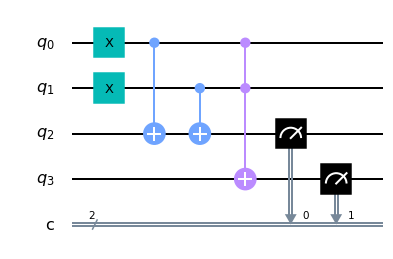

In [6]:
qc = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc.x(0) 
qc.x(1)
# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc.ccx(0,1,3)
# extract outputs
qc.measure(2,0) # extract XOR value
qc.measure(3,1) # extract AND value

qc.draw(output='mpl')

**Explanation of circuit**

As q0 and q1 both are 1, the target qubit gets overriden with a value of 1. Now the measurement is extracted from qubit 3 as 1.

### Step 5: Run the circuit on a quantum simulator 

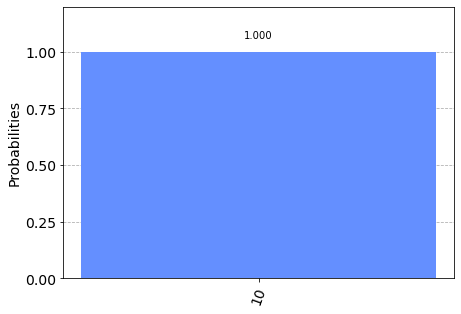

In [7]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

We get the desired result of 10 or 2 in binary after adding 1+1. You can add any number you want by changing the inputs of the qubits.